### Context
Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models.
In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. 
The board decides to rope in an analytics professional to improve the existing campaign.

### Objective
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. 
Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. 
Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description
* Age: The age of the individual in years.
* Gender: The gender of the individual, categorized as male or female.
* Profession: The occupation or profession of the individual.
* Marital_status: The marital status of the individual, such as married &, single
* Education: The educational qualification of the individual Graduate and Post Graduate
* No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
* Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
* House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
* Partner_working: A binary variable indicating whether the individuals partner is employed "Yes" or "No"
* Salary: The individual's salary or income.
* Partner_salary: The salary or income of the individual's partner, if applicable.
* Total_salary: The total combined salary of the individual and their partner (if applicable).
* Price: The price of a product or service.
* Make: The type of automobile

### 1. Data Overview

##### 1.a. Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

##### 1.b. Load the data

In [2]:
path="austo_automobile+%282%29+%281%29.csv";
master=pd.read_csv(path);
dt=pd.read_csv(path);

##### 1.c. Check the structure of the data

In [3]:
dt.shape

(1581, 14)

Points : The data provided is having 1581 records and 14 columns

##### 1.d. Check the types of the data

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


Points :
* There are a total of 13 variables available for Analysis in which 6 are numerical variables and 7 Categorical Variables :
  
  Numerical :
  1. Age
  2. No_of_Dependents
  3. Salary
  4. Partner_salary
  5. Total_salary
     
  Categorical Variables :
  1. Gender
  2. Profession
  3. Marital_status
  4. Education
  5. Personal_loan
  6. House_loan
  7. Partner_working
  8. Make

* There are missing values in the columns : Gender, Partner_salary which needs to be addressed
* Total Memory Usage of this file is 173.1+ KB

##### 1.e. Sampling the Data

In [5]:
dt.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


##### 1.f. Check for and treat (if needed) missing values

In [6]:
dt.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

###### Filling missing Values for "Partner_salary" 

In [7]:
dt_yes_pSalary=dt[dt["Partner_working"]=='Yes']
dt_no_pSalary=dt[dt["Partner_working"]=='No']

In [8]:
dt_yes_pSalary["Partner_salary"].fillna(dt_yes_pSalary["Total_salary"]-dt_yes_pSalary["Salary"],inplace =True)

In [9]:
dt_no_pSalary["Partner_salary"].fillna('0.0',inplace=True)

In [10]:
dt_no_pSalary.isnull().sum()

Age                  0
Gender              23
Profession           0
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Partner_salary       0
Total_salary         0
Price                0
Make                 0
dtype: int64

In [11]:
dt_yes_pSalary.isnull().sum()

Age                  0
Gender              30
Profession           0
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Partner_salary       0
Total_salary         0
Price                0
Make                 0
dtype: int64

In [12]:
dt_new=pd.concat([dt_yes_pSalary, dt_no_pSalary ])

In [13]:
dt_new.isnull().sum()

Age                  0
Gender              53
Profession           0
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Partner_salary       0
Total_salary         0
Price                0
Make                 0
dtype: int64

In [14]:
dt_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1528 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   int64 
 6   Personal_loan     1581 non-null   object
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   object
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(5), object(9)
memory usage: 185.3+ KB


In [15]:
dt_new["Partner_salary"]=dt_new.Partner_salary.astype(float)

##### 1.g. Check for and treat (if needed) data irregularities

In [16]:
dt_new.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


###### Filling missing Values for "Gender"

In [17]:
dt_new["Gender"].isna().sum()

53

In [18]:
dt_new[dt_new["Gender"].isna()==True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
24,46,NaN,Business,Married,Post Graduate,3,Yes,No,Yes,78000,600.0,78600,50000,SUV
25,46,NaN,Salaried,Married,Post Graduate,3,No,No,Yes,87900,700.0,88600,50000,SUV
67,53,NaN,Salaried,Married,Graduate,4,Yes,No,Yes,80900,30000.0,110900,49000,SUV
485,35,NaN,Business,Married,Post Graduate,2,Yes,Yes,Yes,61600,25000.0,86600,31000,Sedan
578,32,NaN,Salaried,Married,Post Graduate,1,Yes,No,Yes,56000,40100.0,96100,31000,Sedan
661,30,NaN,Business,Married,Post Graduate,4,No,No,Yes,67700,26600.0,94300,18000,Sedan
699,30,NaN,Business,Married,Graduate,2,No,No,Yes,42600,800.0,43400,18000,Sedan
756,29,NaN,Business,Married,Post Graduate,3,No,Yes,Yes,75600,27900.0,103500,19000,Sedan
887,28,NaN,Business,Married,Graduate,4,Yes,No,Yes,48600,30200.0,78800,18000,Sedan
889,28,NaN,Salaried,Married,Post Graduate,3,Yes,Yes,Yes,62200,25200.0,87400,19000,Sedan


In [19]:
dt_new["Gender"].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [20]:
dt_new.Gender.replace("Femal","Female",inplace=True)
dt_new.Gender.replace("Femle","Female",inplace=True)

In [21]:
dt_new["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [22]:
dt_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 185.3+ KB


##### 1.h. Check the statistical summary

In [23]:
dt_new.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,2,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


In [24]:
dt_new["Profession"].unique()

array(['Business', 'Salaried'], dtype=object)

In [25]:
dt_new["Education"].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [26]:
dt_new["Marital_status"].unique()

array(['Married', 'Single'], dtype=object)

In [27]:
dt_new["Make"].unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

In [28]:
dt_new.groupby(["Gender"])["Age"].count()

Gender
Female     329
Male      1199
Name: Age, dtype: int64

##### 1.i. Observations and Insights
* Age Group of the Customers varies between 22 and 54 and  75% of the customers are of <38 years Age Group and the distribution is Strongly Right Skewed.
* 75% of the total customers (1199 out of 1581) are Male Customers and only 329 are Female Customers. However there are some missing values.
* 56% of the Total customers (896 out of 1581) are Salaried individuals and 685 are Business persons.
* 62% of the customers (985 out of 1581) are with Education Qualification as Post-Graduate remaining are Graduates.
* Around 92% of the customers are married while 8% is Single.
* No. of dependants for the customers varies between 0 and 4 with an average of 2 dependants. 25th and 50th percentile of depdents is same and the distribution is left skewed
* Around 50% of the customers are having Personal loan.
* Around 66% of the customers are having House Loans while other 34% not.
* Around 55% of the customers are having Working partners.
* Salary income of customers varies between 30000 USD to 99300 USD.
* The most costlier vechicle is of 70000 USD and the most cheapest one is of 18000 USD
* The most popular  type among the customers is Sedan and 44% of the total customers choose Sedan.

### 2. Univariate Analysis
- Explore all the variables (categorical and numerical) in the data - Check for and treat (if needed) outliers - Observations and Insights

##### 2.1. Age

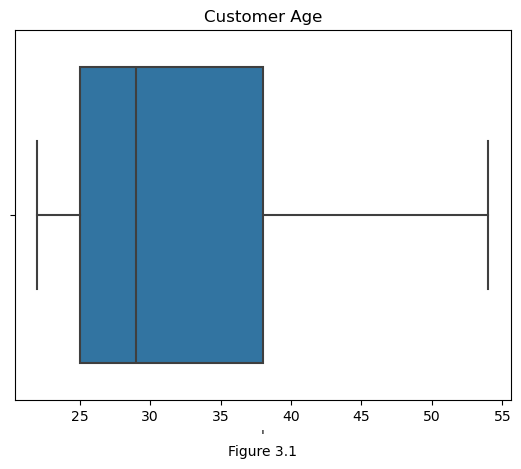

In [466]:
plt.Figure(figsize=(8,5))
sns.boxplot(data=dt_new,x='Age');

# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Customer Age')
plt.xlabel(''''
Figure 3.1''',)
plt.show()

The Average Age of the customer is 31. 
Age Group of the Customers varies between 22 and 54 and 75% of the customers are of <38 years Age Group and the distribution is Strongly Right Skewed.

##### 2.2 Gender

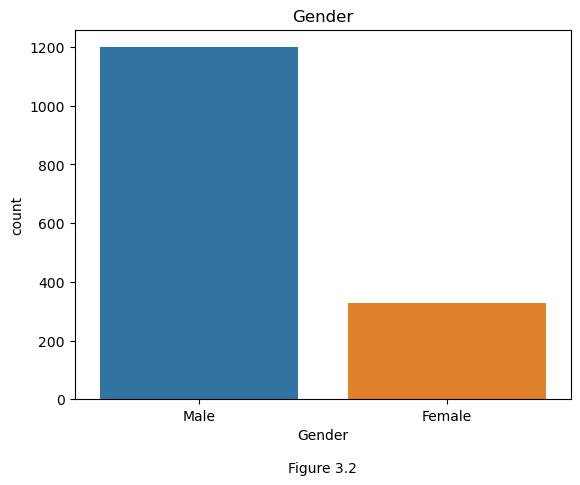

In [468]:
plt.Figure(figsize=(8,5))
sns.countplot(data=dt_new,x='Gender');

# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Gender')
plt.xlabel('''Gender

Figure 3.2''',)
plt.show()

Out of a total of 1,581 customers, 75% (1,199) are male customers, while only 329 are female customers.

##### 2.3 Profession

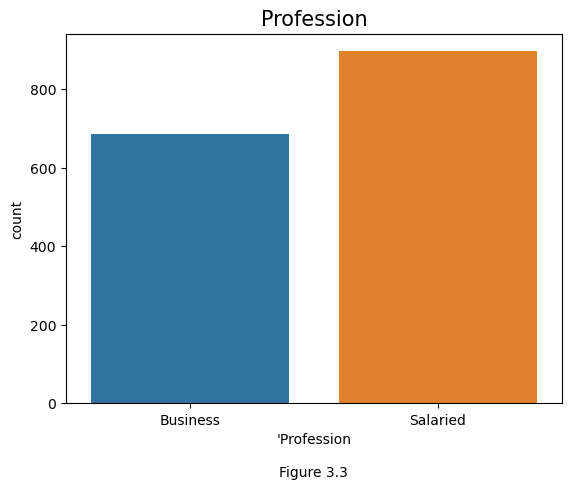

In [469]:
plt.Figure(figsize=(8,5))
sns.countplot(data=dt_new,x='Profession');

# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Profession',fontsize = 15)
plt.xlabel(''''Profession

Figure 3.3''',)
plt.show()

The no. of Customers that are Salaried individuals are 56% slightly greater than that of Business persons.

##### 2.4 Marital Status

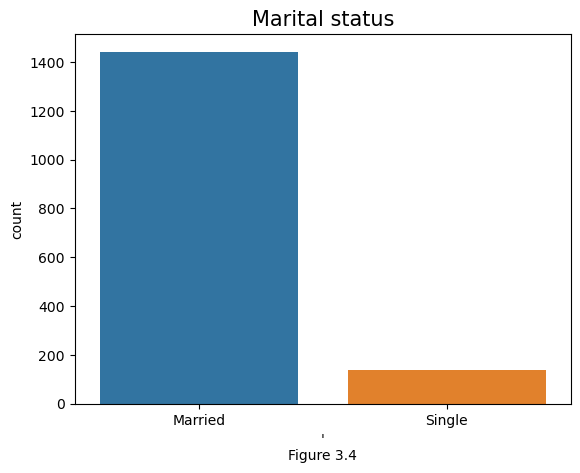

In [470]:
plt.Figure(figsize=(8,5))
sns.countplot(data=dt_new,x='Marital_status');

# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Marital status',fontsize = 15)
plt.xlabel(''''
Figure 3.4''',)
plt.show()

92% of the customers are Married people and 8% is Single.

##### 2.5 Education Status

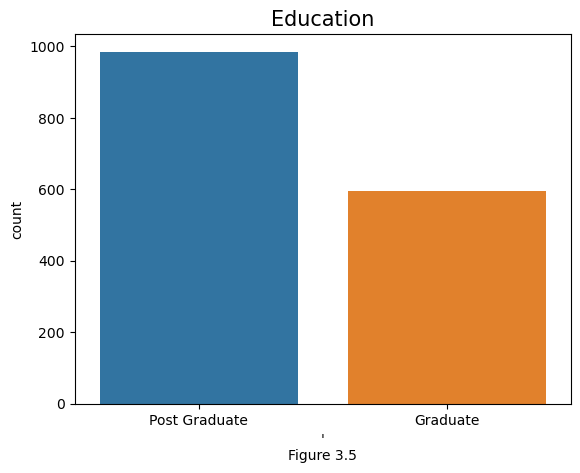

In [471]:
plt.Figure(figsize=(8,5))
sns.countplot(data=dt_new,x='Education');

# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Education',fontsize = 15)
plt.xlabel(''''
Figure 3.5''',)
plt.show()

* Of the total customers (1,581), 62% (985) are post-graduates, and the remainder are graduates.
* All customers have a good educational background

##### 2.6 No. of Dependants

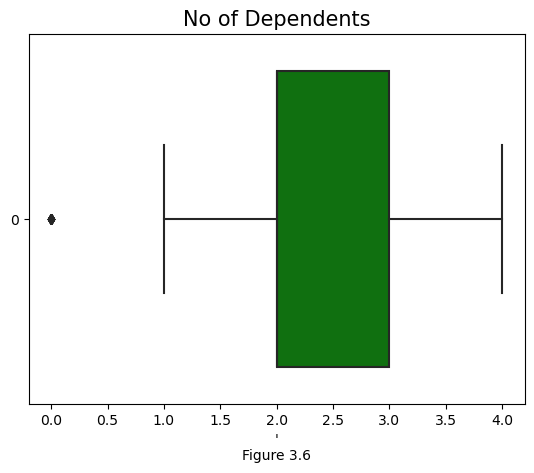

In [472]:
plt.Figure(figsize=(8,5))
sns.boxplot(dt_new["No_of_Dependents"],color='Green',orient='h')
# plt.xlim(0,1581)
# plt.ylim(0,5)
plt.title('No of Dependents',fontsize = 15)
plt.xlabel(''''
Figure 3.6''',)
plt.show()

In [36]:
dt_new[dt_new["No_of_Dependents"]==0].count()

Age                 20
Gender              19
Profession          20
Marital_status      20
Education           20
No_of_Dependents    20
Personal_loan       20
House_loan          20
Partner_working     20
Salary              20
Partner_salary      20
Total_salary        20
Price               20
Make                20
dtype: int64

75% of the customers are having 2 to 3 dependants. There are some outliers - the customers with 0 dependants

##### 2.7 Personal_loan

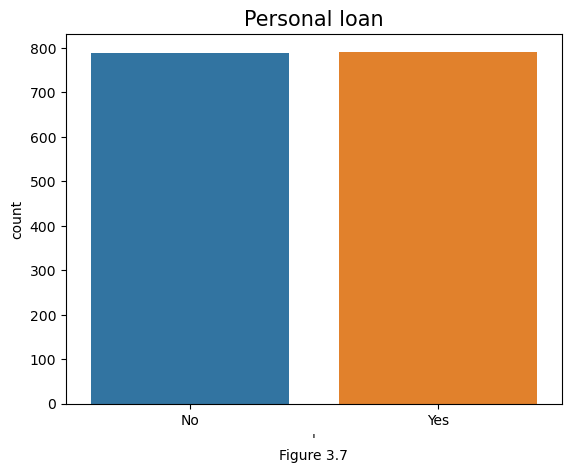

In [473]:
plt.Figure(figsize=(8,5))
sns.countplot(data=dt_new,x='Personal_loan');

# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Personal loan',fontsize = 15)
plt.xlabel(''''
Figure 3.7''',)
plt.show()

The number of customers with a personal loan is nearly equivalent to those without one

##### 2.8 House_loan

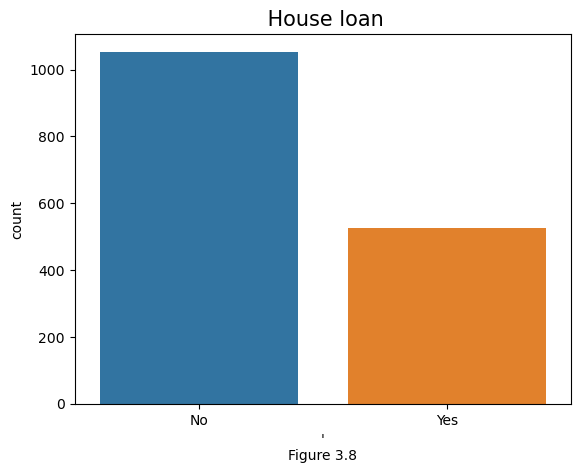

In [474]:
plt.Figure(figsize=(8,5))
sns.countplot(data=dt_new,x='House_loan');

# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title(' House loan',fontsize = 15)
plt.xlabel(''''
Figure 3.8''',)
plt.show()

##### 2.9 Customers with Working Partners

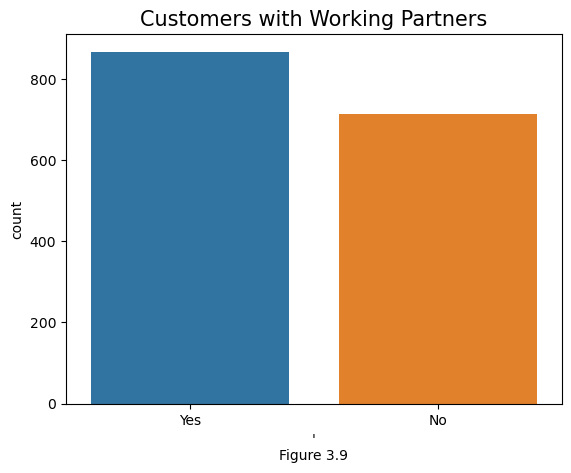

In [475]:
plt.Figure(figsize=(8,5))
sns.countplot(data=dt_new,x='Partner_working');

# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Customers with Working Partners',fontsize = 15)
plt.xlabel(''''
Figure 3.9''',)
plt.show()

Around 55% of the customers are having Working partners.

##### 2.10 Salary of the Customers

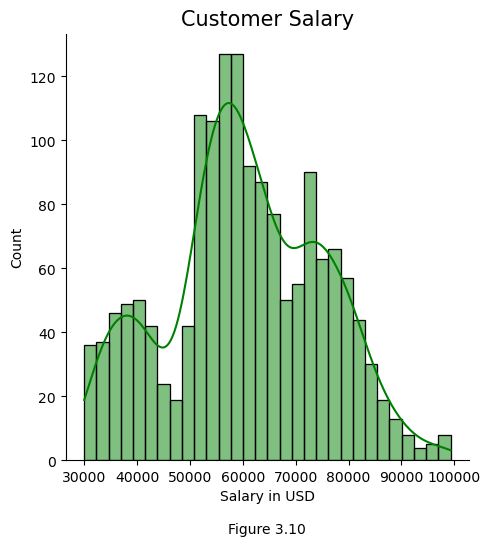

In [476]:
plt.Figure(figsize=(8,5))
sns.displot(dt_new["Salary"], bins=30,kde=True,color='Green')
# plt.xlim(0,1581)
# plt.ylim(0,5)
plt.title('Customer Salary',fontsize = 15)
plt.xlabel('''Salary in USD

Figure 3.10''',)
plt.show()

The salary income of customers ranges from 30000 USD to 99300 USD, with an average salary of 60392 USD.

##### 2.11 Partner Salary

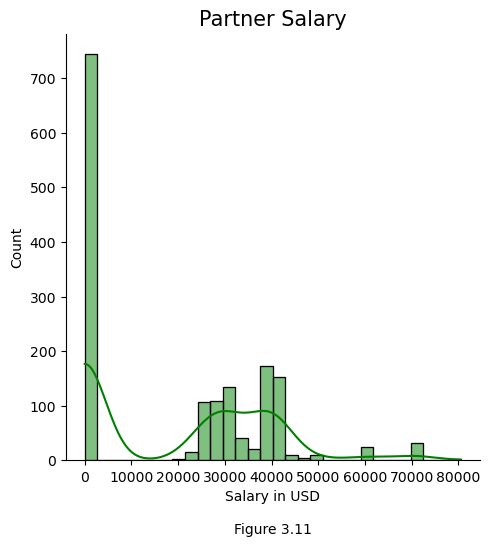

In [478]:
plt.Figure(figsize=(8,5))
sns.displot(dt_new["Partner_salary"], bins=30,kde=True,color='Green')
# plt.xlim(0,1581)
# plt.ylim(0,5)
plt.title('Partner Salary',fontsize = 15)
plt.xlabel('''Salary in USD

Figure 3.11''',)
plt.show()

75% of partner salaries range between 0 and 38100 USD.
The distribution shows outliers at both ends. 
The average salary for a working partner is 19234 USD.

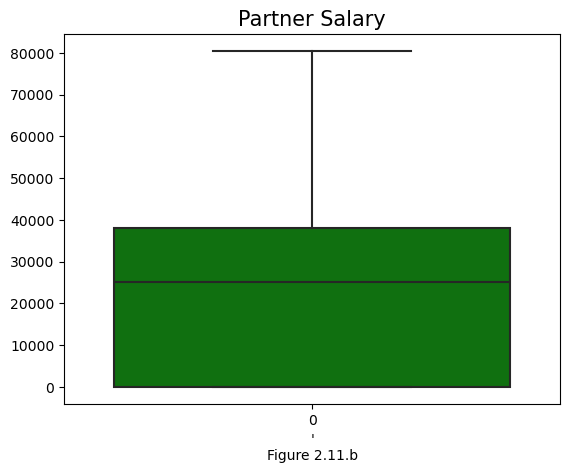

In [42]:
plt.Figure(figsize=(8,5))
sns.boxplot(dt_new["Partner_salary"],color='Green')
# plt.xlim(0,1581)
# plt.ylim(0,5)
plt.title('Partner Salary',fontsize = 15)
plt.xlabel(''''
Figure 2.11.b''',)
plt.show()

##### 2.12 Total Salary

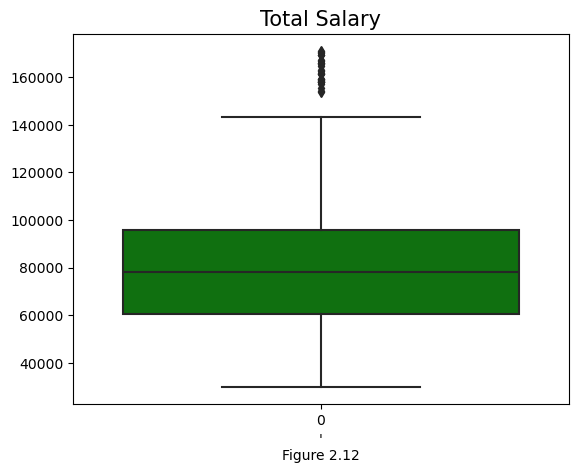

In [43]:
plt.Figure(figsize=(8,5))
sns.boxplot(dt_new["Total_salary"],color='Green')
# plt.xlim(0,1581)
# plt.ylim(0,5)
plt.title('Total Salary',fontsize = 15)
plt.xlabel(''''
Figure 2.12''',)
plt.show()

Points : 
75% of the Total Salary of the Customers are between 95900 USD and there are outliers.

##### 2.14 Make

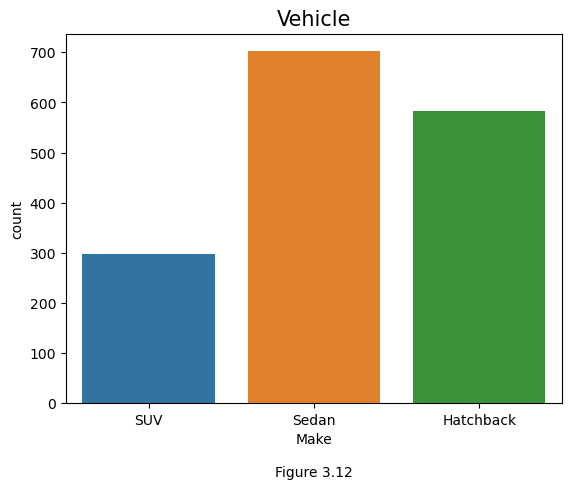

In [540]:
#Customers with Profession
#Customers Age Vs Gender

#plt.Figure(figsize=(20,7))
sns.countplot(data=dt_new2,x='Make')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Vehicle',fontsize = 15)
plt.xlabel('''Make

Figure 3.12''')
plt.show()

The most popular vehicle type among customers is the Sedan, chosen by 44% of all customers. 
A majority of customers prefer Sedans and Hatchbacks
No. of customers that prefer SUVs are very less compared to other types.

##### Price

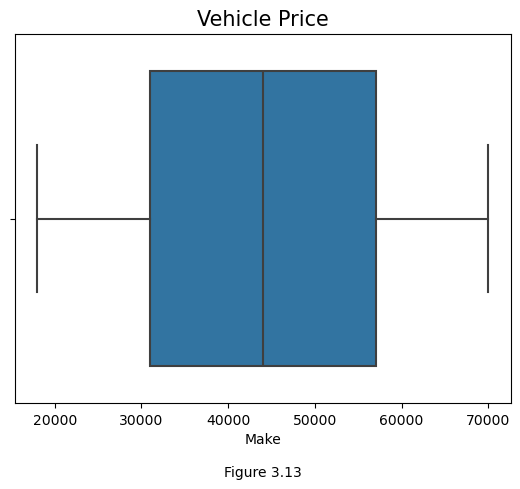

In [542]:
#Customers with Profession
#Customers Age Vs Gender

#plt.Figure(figsize=(20,7))
sns.boxplot(data=dt_Price,x='Price')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Vehicle Price',fontsize = 15)
plt.xlabel('''Make

Figure 3.13''')
plt.show()

The most expensive vehicle costs 70000 USD, while the least expensive one costs 18000 USD. The average vehicle price is 35597 USD.

### 3. Bivariate Analysis
- Explore the relationship between all numerical variables - Explore the correlation between all numerical variables - Explore the relationship between categorical vs numerical variables

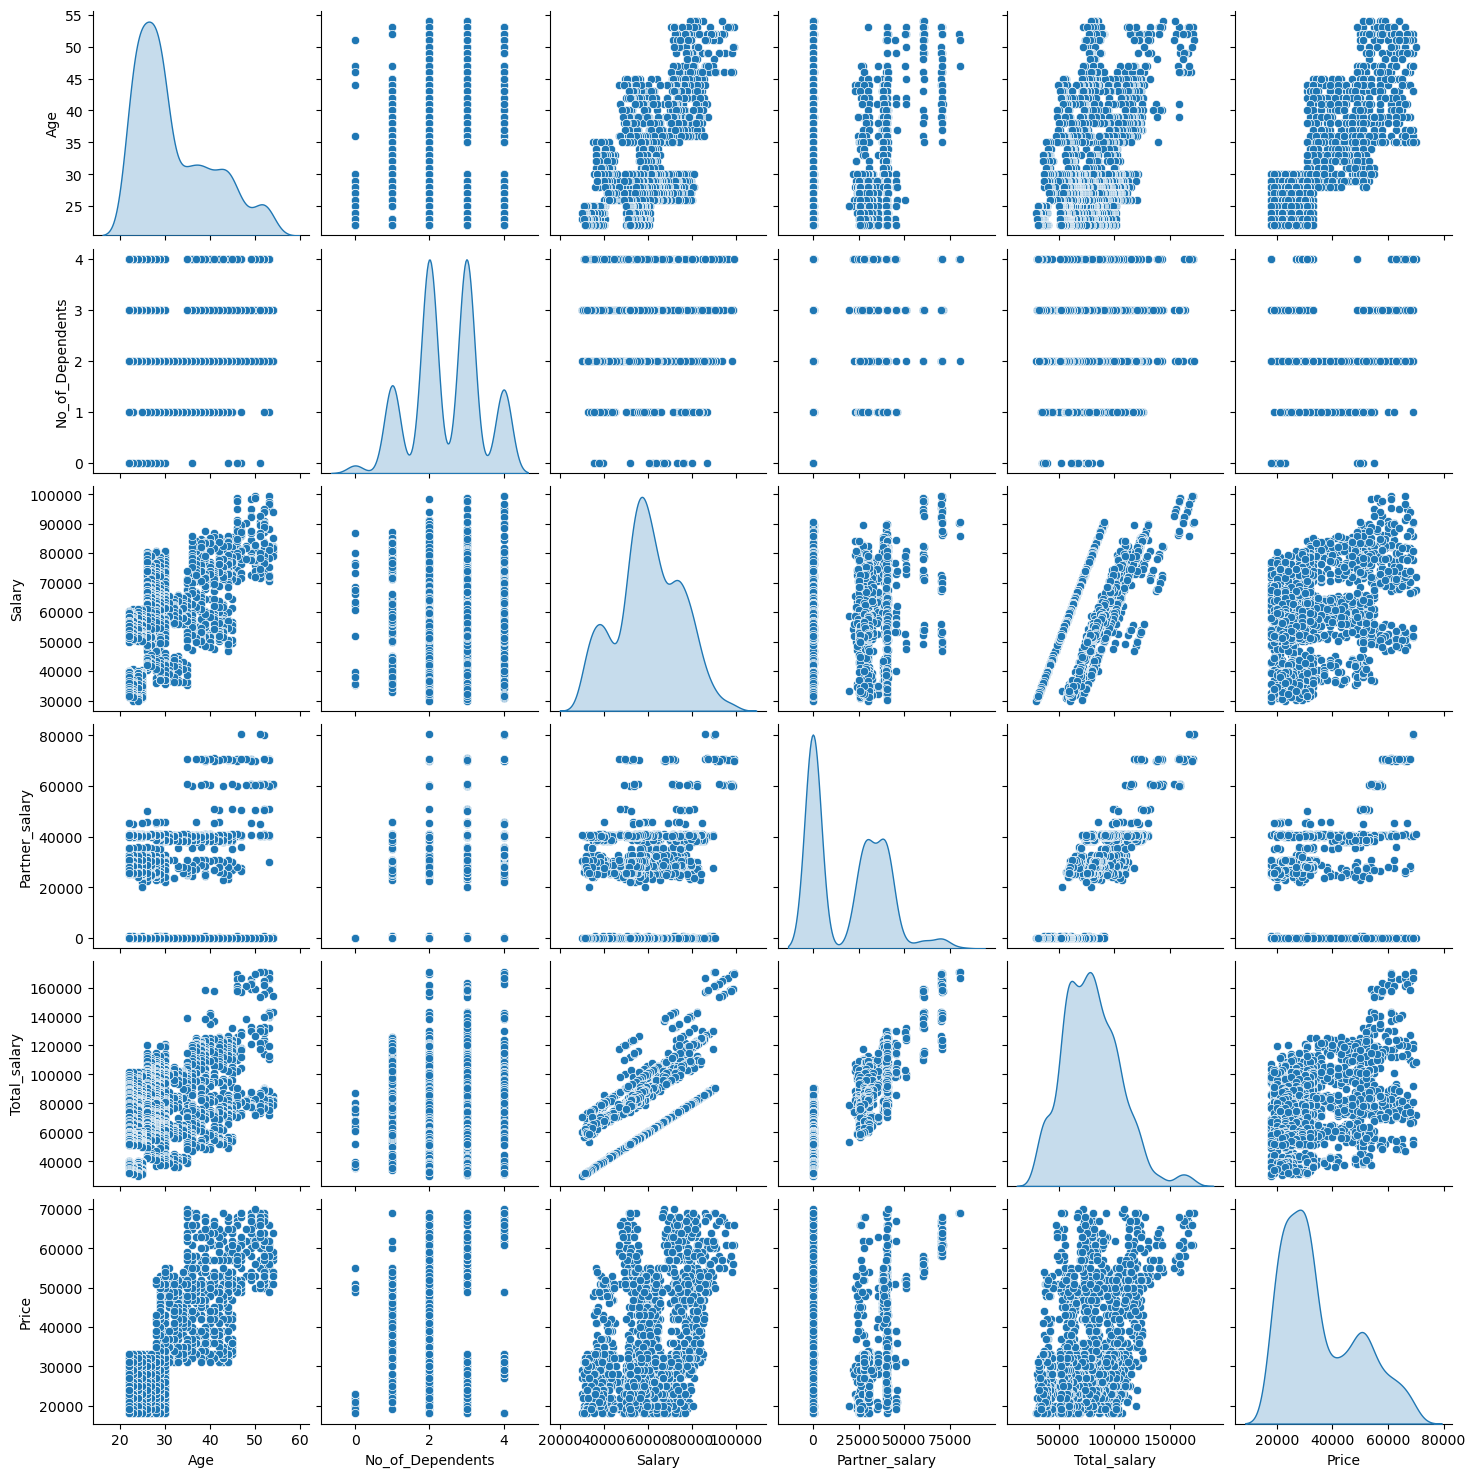

In [544]:
sns.pairplot(dt_new,diag_kind='kde')
plt.show()

There is a positive correlation between age and salary.
Age and price also exhibit a positive correlation.

In [46]:
dt_numeric=dt_new.select_dtypes(include=np.number)

In [47]:
dt_numeric.corr()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.000000,-0.189614,0.616899,0.135702,0.458869,0.797831
No_of_Dependents,-0.189614,1.000000,-0.031746,0.144320,0.092890,-0.135839
Salary,0.616899,-0.031746,1.000000,0.087155,0.641560,0.409920
Partner_salary,0.135702,0.144320,0.087155,1.000000,0.820069,0.171875
Total_salary,0.458869,0.092890,0.641560,0.820069,1.000000,0.367823
Price,0.797831,-0.135839,0.409920,0.171875,0.367823,1.000000


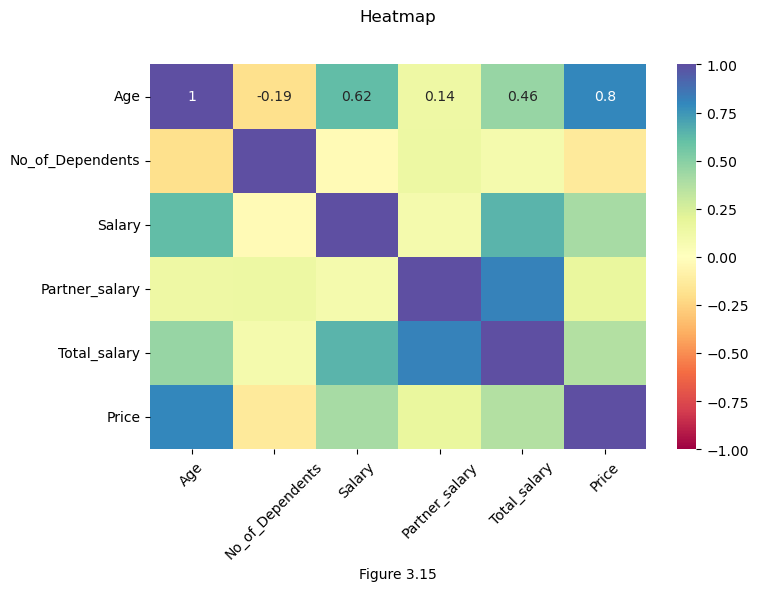

In [546]:
plt.figure(figsize=(8, 5))
sns.heatmap(data=dt_numeric.corr(),annot=True, vmax=1, vmin=-1,cbar=True,cmap="Spectral")
plt.title('''Heatmap

''')
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 
plt.xlabel('Figure 3.15')
plt.show()

Points :
* Age and Salary is having a positive correlation 
* Total Salary and Partner Salary with a strong Correlation
* Age and Price of Vehicle is having a strong postive correlation

###### Customer Age with Gender

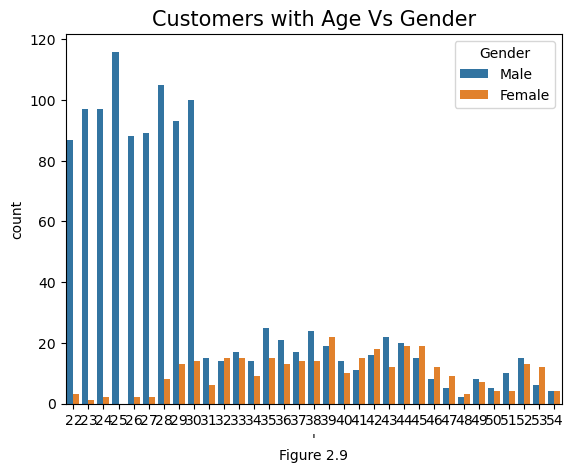

In [49]:
#Customers Age Vs Gender

#plt.Figure(figsize=(20,7))
#sns.barplot(data=dt_new,x='Gender',y='Age',hue='Gender')
sns.countplot(data=dt_new,x='Age',hue='Gender')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Customers with Age Vs Gender',fontsize = 15)
plt.xlabel(''''
Figure 2.9''',)
plt.show()

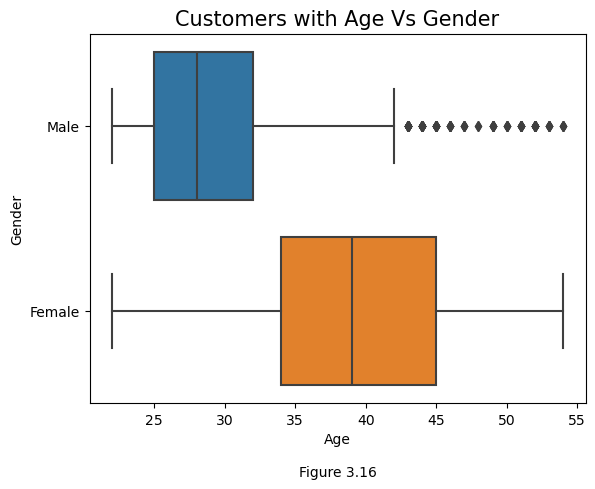

In [547]:
#Customers with Profession
#Customers Age Vs Gender

#plt.Figure(figsize=(20,7))
sns.boxplot(data=dt_new,y='Gender',x='Age')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Customers with Age Vs Gender',fontsize = 15)
plt.xlabel('''Age

Figure 3.16''',)
plt.show()

* 75% of the Maler customers are of Age group 25 to 32 with an Average and and the there are outliers.
* 75 % of Female customers are with the Age group 34 to 45.
* Male Customers are more interested to buy Vehicles in a median age of 26 and Female customers tends to purchase vehicle on a median age of 38


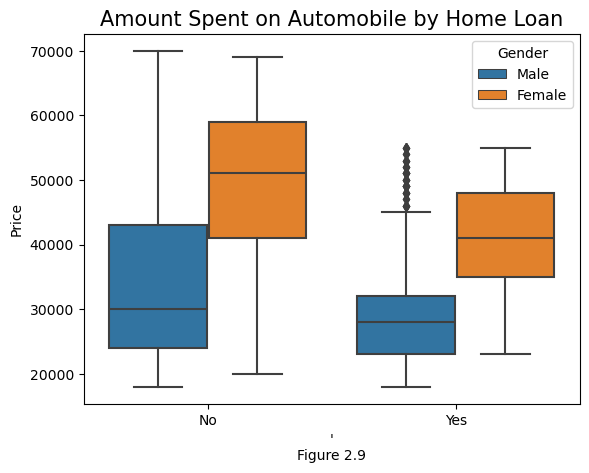

In [96]:
#Customers with Profession
#Customers Age Vs Gender

#plt.Figure(figsize=(20,7))
sns.boxplot(data=dt_new,x='House_loan',y='Price',hue='Gender')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Amount Spent on Automobile by Home Loan',fontsize = 15)
plt.xlabel(''''
Figure 2.9''',)
plt.show()

##### Vehicle Vs Price

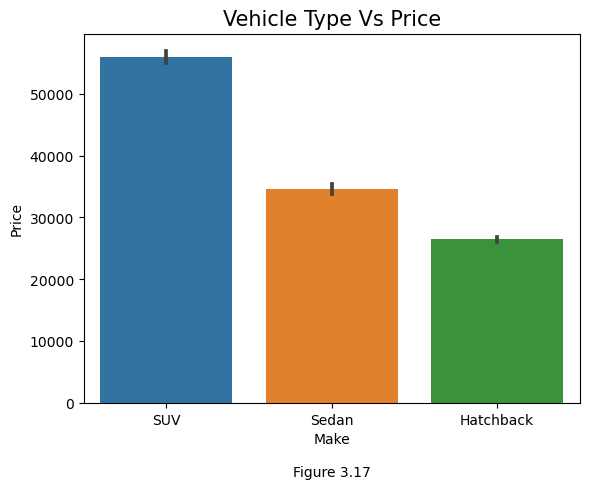

In [551]:
#Customers with Profession
#Customers Age Vs Gender

#plt.Figure(figsize=(20,7))
sns.barplot(data=dt_new,x='Make',y='Price')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Vehicle Type Vs Price',fontsize = 15)
plt.xlabel('''Make

Figure 3.17''',)
plt.show()

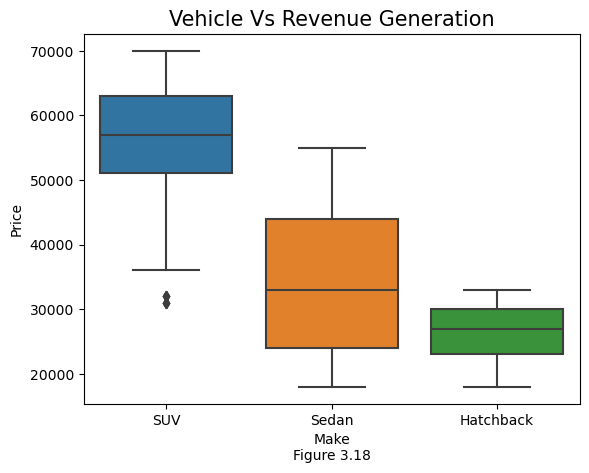

In [557]:

#plt.Figure(figsize=(20,7))
sns.boxplot(data=dt_new2,x='Make', y='Price')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Vehicle Vs Revenue Generation',fontsize = 15)
plt.xlabel('''Make
Figure 3.18''',)
plt.show()

•	The 25th percentile of SUV prices significantly exceeds the 95th percentile of Sedan prices, indicating that SUVs are notably more expensive compared to both Sedans and other types of vehicles. 
•	Moreover, SUVs lead in revenue generation


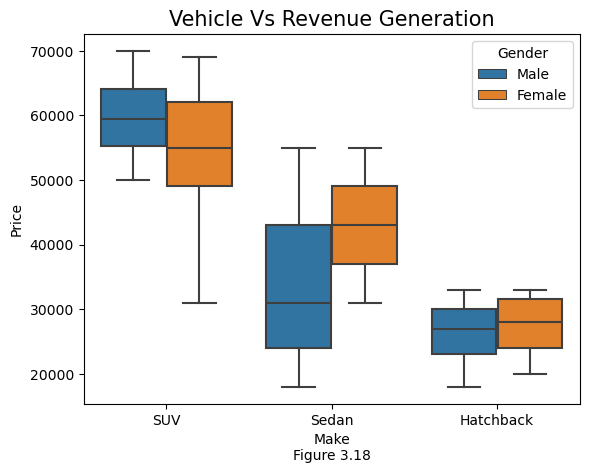

In [556]:

#plt.Figure(figsize=(20,7))
sns.boxplot(data=dt_new2,x='Make', y='Price', hue='Gender')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Vehicle Vs Revenue Generation',fontsize = 15)
plt.xlabel('''Make
Figure 3.19''',)
plt.show()

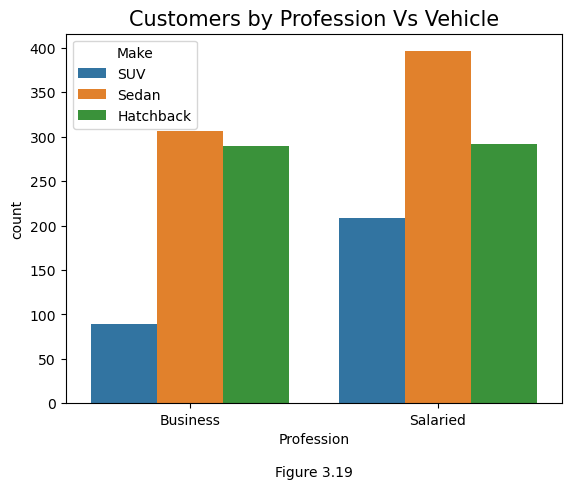

In [558]:

#plt.Figure(figsize=(20,7))
sns.countplot(data=dt_new2,x='Profession', hue='Make')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Customers by Profession Vs Vehicle',fontsize = 15)
plt.xlabel('''Profession

Figure 3.19''',)
plt.show()

* Most popular among both Salaried and Business persons is Sedan.
* Compared to Business individuals, Salaried persons spend more on Automobiles
* Majority of the customers prefer Sedan and HAtchback and least no. of customers go with SUVs

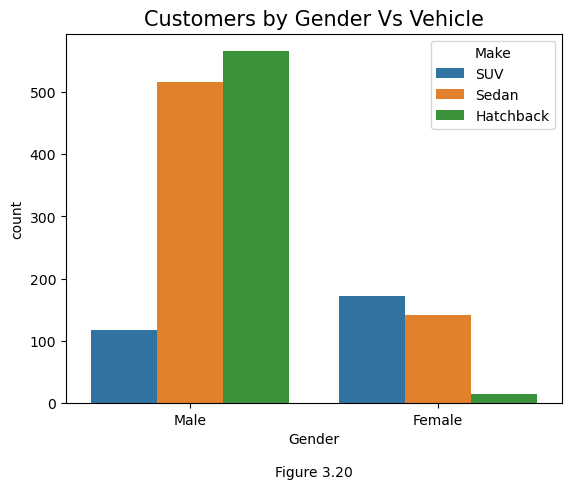

In [564]:

#plt.Figure(figsize=(20,7))
sns.countplot(data=dt_new2,x='Gender', hue='Make')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Customers by Gender Vs Vehicle',fontsize = 15)
plt.xlabel('''Gender

Figure 3.20''',)
plt.show()

Most favourite choices for Men is Hatchback followed by Sedan. 
Women tend to prefer SUVs.
Men prefer to buy cheapest or Affordable vehicles while Women prefer expensive cars

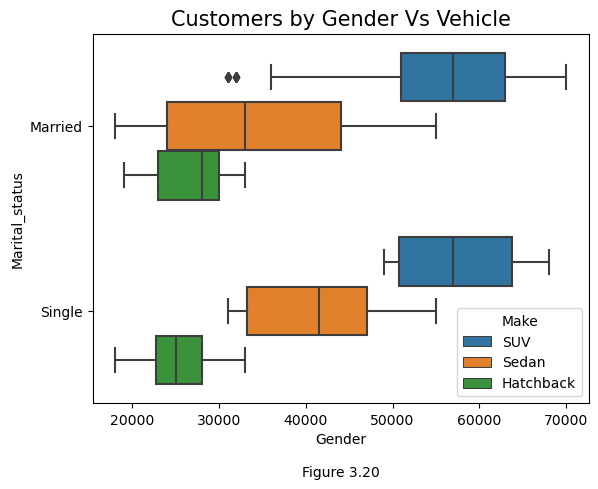

In [573]:

#plt.Figure(figsize=(20,7))
sns.boxplot(dt_new2,x='Price',y='Marital_status', hue='Make')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Customers by Gender Vs Vehicle',fontsize = 15)
plt.xlabel('''Gender

Figure 3.20''',)
plt.show()

### 4. Key Questions
Explore the data to answer the following key questions:

#### 4.1. Do men tend to prefer SUVs more compared to women? 

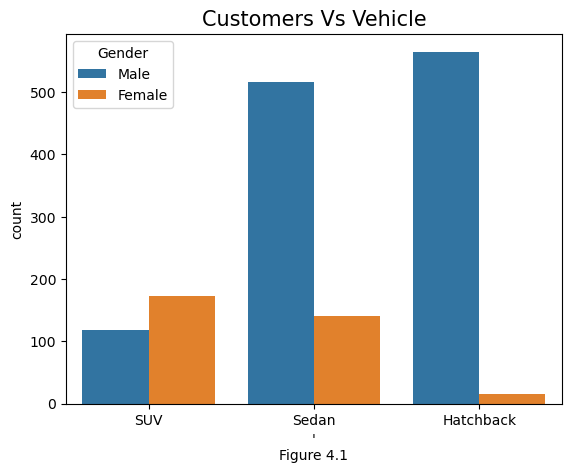

In [417]:

#plt.Figure(figsize=(20,7))
sns.countplot(data=dt_new2,x='Make',hue='Gender')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Customers Vs Vehicle',fontsize = 15)
plt.xlabel(''''
Figure 4.1''',)
plt.show()

Answer : No, Male Customers prefer Hatchbacks more than all other vehicle types. 

Points :
Male customers prefer to buy Hatchback compated to all other vehicle types. 
Female customers tend to prefer SUVs compared to male customers.

#### 4.2. What is the likelihood of a salaried person buying a Sedan?

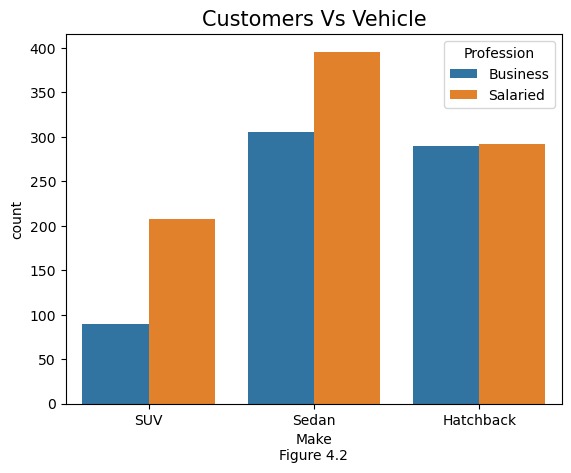

In [82]:

#plt.Figure(figsize=(20,7))
sns.countplot(data=dt_new2,x='Make',hue='Profession')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Customers Vs Vehicle',fontsize = 15)
plt.xlabel('''Make
Figure 4.2''',)
plt.show()

In [68]:
# dt_new2[dt_new2["Profession"]=='Salaried'].groupby(['Make']).value_count()
count_sedan = dt_new2['Make'].value_counts()['Sedan']


In [69]:
dt_new2.isnull().sum()
dt.shape

(1581, 14)

In [70]:
Percent=count_sedan/1581*100

In [71]:
Percent.round(2)

44.4

Answer : The likelihood of a salaried person buying a Sedan can be estimated to be around 44.4%. Salaried Persons choose Sedan over the other types of vehicle.

#### 4.3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale? 

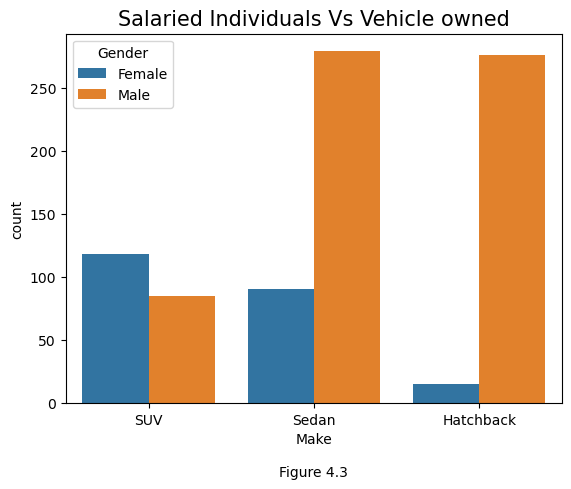

In [88]:

#plt.Figure(figsize=(20,7))
sns.countplot(data=dt_new2[dt_new2['Profession']=='Salaried'],x='Make', hue='Gender')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Salaried Individuals Vs Vehicle owned',fontsize = 15)
plt.xlabel('''Make

Figure 4.3''',)
plt.show()

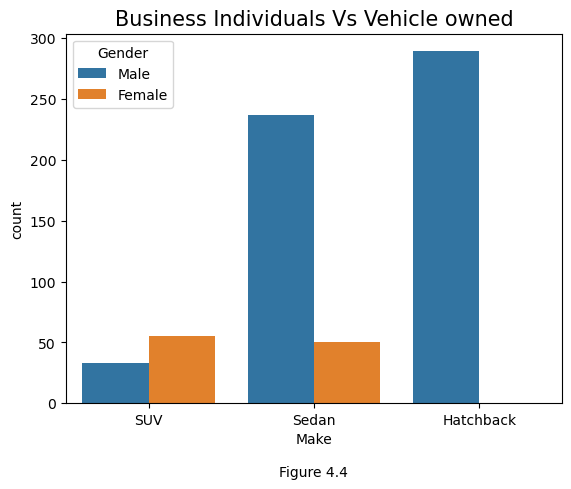

In [87]:

#plt.Figure(figsize=(20,7))
sns.countplot(data=dt_new2[dt_new2['Profession']=='Business'],x='Make', hue='Gender')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Business Individuals Vs Vehicle owned',fontsize = 15)
plt.xlabel('''Make

Figure 4.4''',)
plt.show()

* The above graphs clearly depicts that male salaried customers show a preference for Sedans over the other two types of vehicles. And from the second graph, male Business persons choose Hatchback over other 2 types.
* Conversely, males tend to choose Sedans and Hatchbacks more frequently than SUVs.
* This preference holds true for both salaried individuals and businesspersons.
* On the other hand, women tend to prefer SUVs.
* This leads to the fact that Sheldon Cooper's claim is not valid.

#### 4.4 How does the the amount spent on purchasing automobiles vary by gender?

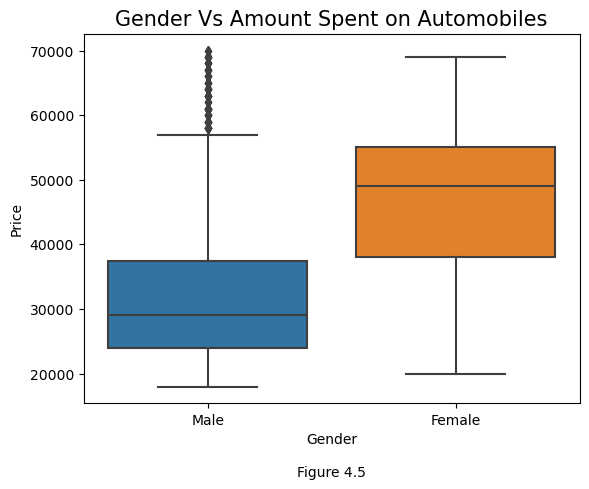

In [91]:
#plt.Figure(figsize=(20,7))
sns.boxplot(data=dt_new2,x='Gender', y='Price')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Gender Vs Amount Spent on Automobiles',fontsize = 15)
plt.xlabel('''Gender

Figure 4.5''',)
plt.show()

* Approximately 75% of the amount spent by women on automobiles is around 54000 USD, whereas for men it is 37000 USD.
* The median price paid for automobiles is higher for women compared to men, although there are outliers towards the extreme values.
* The distribution of the amount spent by men is highly right skewed, whereas for women it is slightly left-skewed.

#### 4.5. How much money was spent on purchasing automobiles by individuals who took a personal loan? 

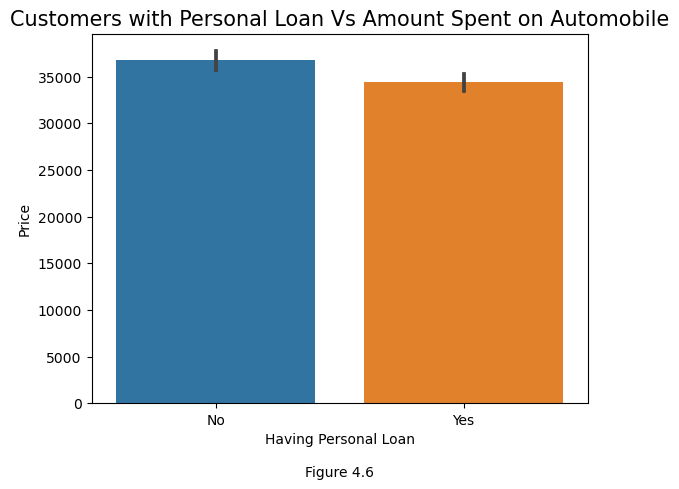

In [426]:
#Customers with Profession
#Customers Age Vs Gender

#plt.Figure(figsize=(20,7))
sns.barplot(data=dt_new,x='Personal_loan',y='Price')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Customers with Personal Loan Vs Amount Spent on Automobile',fontsize = 15)
plt.xlabel('''Having Personal Loan

Figure 4.6''',)
plt.show()

In [427]:
dt_new.groupby('Personal_loan')['Price'].mean().round(2)

Personal_loan
No     36742.71
Yes    34457.07
Name: Price, dtype: float64

Point :
* Customers with Personal loan have spent an average of 34,457.07 USD on automobiles.
* 	The average spending for customers without a personal loan is slightly higher than that of customers with a personal loan


#### 4.6. How does having a working partner influence the purchase of higher-priced cars?

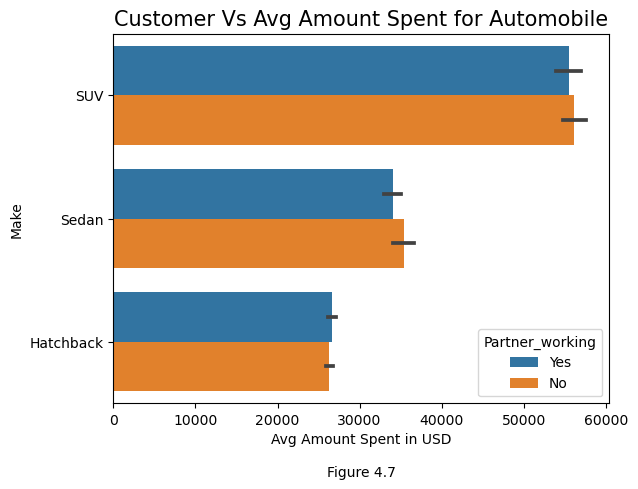

In [428]:
#plt.Figure(figsize=(20,7))
sns.barplot(data=dt_new2,x='Price', y='Make',hue='Partner_working')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Customer Vs Avg Amount Spent for Automobile',fontsize = 15)
plt.xlabel('''Avg Amount Spent in USD

Figure 4.7''')
plt.show()

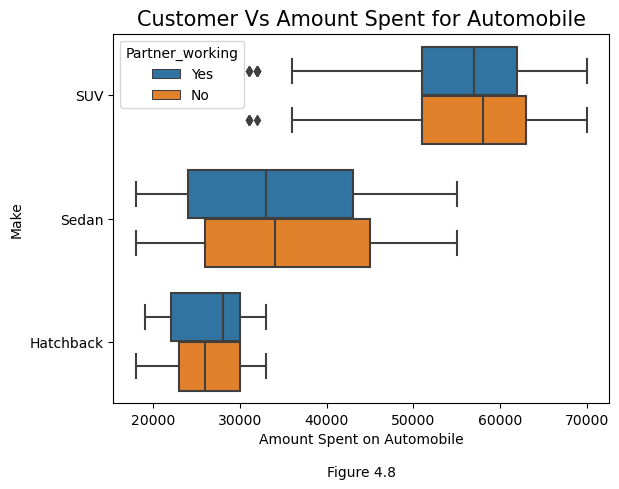

In [450]:
#plt.Figure(figsize=(20,7))
sns.boxplot(data=dt_new2,x='Price', y='Make',hue='Partner_working')
# plt.xlim(20,60)
# plt.ylim(0,350)
plt.title('Customer Vs Amount Spent for Automobile',fontsize = 15)
plt.xlabel('''Amount Spent on Automobile

Figure 4.8''')
plt.show()

In [459]:
dt_new2[["Salary","Partner_salary", "Total_salary", "Price"]].corr().round(2)

,Salary,Partner_salary,Total_salary,Price
Salary,1.00,0.09,0.64,0.41
Partner_salary,0.09,1.00,0.82,0.17
Total_salary,0.64,0.82,1.00,0.37
Price,0.41,0.17,0.37,1.00


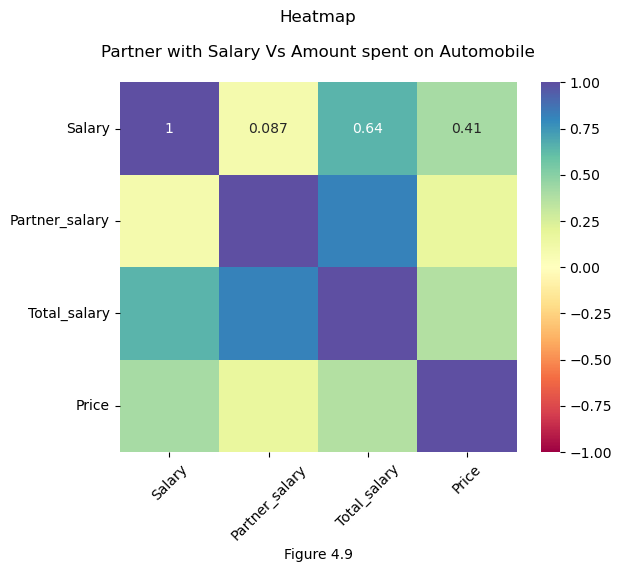

In [457]:
sns.heatmap(dt_new2[["Salary","Partner_salary", "Total_salary", "Price"]].corr(), annot = True, vmin=-1, vmax=+1,cmap="Spectral");
plt.title('''Heatmap

Partner with Salary Vs Amount spent on Automobile
''')
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 
plt.xlabel('Figure 4.9')
plt.show()

Point :
* The correlation value between Partner's Salary and the Price of the vehicle is only 0.17, suggesting that having a working partner does not significantly influence the amount spent on automobiles.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Salary          1581 non-null   int64  
 1   Partner_salary  1581 non-null   float64
 2   Total_salary    1581 non-null   int64  
 3   Price           1581 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 49.5 KB


In [568]:
dt_new[dt_new["Gender"]=='Female'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,329.0,39.525836,7.412093,22.0,34.0,39.0,45.0,54.0
No_of_Dependents,329.0,2.039514,0.924738,0.0,1.0,2.0,3.0,4.0
Salary,329.0,66194.528875,14577.401713,34800.0,56200.0,64600.0,78000.0,99300.0
Partner_salary,329.0,22494.832827,23421.887643,0.0,0.0,25800.0,40200.0,80400.0
Total_salary,329.0,88689.361702,29120.122996,36800.0,65600.0,84000.0,108700.0,171000.0
Price,329.0,47705.167173,11244.836378,20000.0,38000.0,49000.0,55000.0,69000.0


In [571]:
dt_new[dt_new["Gender"]=='Male'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1199.0,29.952460,7.500378,22.0,25.0,28.0,32.0,54.0
No_of_Dependents,1199.0,2.561301,0.917846,0.0,2.0,3.0,3.0,4.0
Salary,1199.0,58878.065054,14320.213282,30000.0,51200.0,58500.0,69350.0,99300.0
Partner_salary,1199.0,18699.082569,18563.867758,0.0,0.0,25200.0,32700.0,80500.0
Total_salary,1199.0,77577.147623,24023.731899,30600.0,59500.0,76300.0,93350.0,170000.0
Price,1199.0,32817.347790,12299.239195,18000.0,24000.0,29000.0,37500.0,70000.0
